<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 726 (delta 29), reused 0 (delta 0), pack-reused 660
Receiving objects: 100% (726/726), 3.66 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (307/307), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week5/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week5


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/week5/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0] != 'VXX':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  data = pd.read_csv(csv)
  #calculate return
  R[csv.strip('.csv')] = np.array([np.log(data['Adj Close'][j]/data['Adj Close'][j-1]) for j in range(1,len(data['Adj Close']))])
 

In [5]:
filecsv_list

['VZ.csv',
 'BABA.csv',
 'GOOG.csv',
 'KO.csv',
 'TEL.csv',
 'PG.csv',
 'MAR.csv',
 'FB.csv',
 'BAC.csv',
 'LULU.csv',
 'SKX.csv',
 'JPM.csv',
 'AEP.csv',
 'AMD.csv',
 'DIS.csv',
 'WMT.csv',
 'BRK-B.csv',
 'MCD.csv',
 'AAPL.csv',
 'TM.csv']

In [0]:
def ghm(R_expect,R_cov):
  one = np.ones((len(R_expect),1))
  A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
  B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
  C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
  D = B*C - A**2
  g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
  h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
  min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)
  return g,h,min_sigma

In [0]:
def effcientfrontier(g,h,R_cov,N1,N2):
  sigma = []
  mu = []
  weight = []
  before_ = np.inf
  for i in range(N1,N2):
      w = g + h*0.00000001*i
      sigma_ = 250*np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0]
      if sigma_ > before_:
        sigma.append(np.sqrt((np.exp(sigma_)-1)*np.exp(2*0.00000001*i*250 + sigma_))*100)
        weight.append(w)
        mu.append((np.exp(0.00000001*i*250 + sigma_/2)-1)*100)
      before_ = sigma_
  return sigma,mu,weight

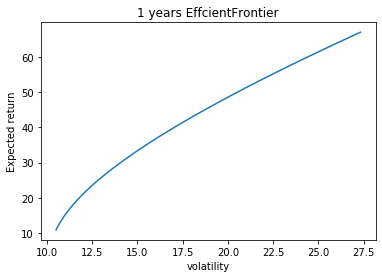

In [8]:
#1 years effcientFronter
R_cov =  np.array(R.cov())
R_expect = np.array(R.mean()).reshape(-1,1)
g1,h1,min_sigma1 = ghm(R_expect,R_cov)
sigma1,mu1,weight1 = effcientfrontier(g1,h1,R_cov,2000,200000)
plt.plot(sigma1,mu1)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier")
plt.show()

In [10]:
weight1[0] # weight for minimum sigma(1 years)

array([[ 0.08879654],
       [ 0.00893865],
       [ 0.01731903],
       [ 0.03946672],
       [ 0.0511082 ],
       [-0.00453715],
       [ 0.03020712],
       [ 0.00707927],
       [-0.02261568],
       [ 0.02504526],
       [ 0.0067401 ],
       [ 0.06029609],
       [ 0.27380248],
       [-0.0584595 ],
       [-0.03350474],
       [ 0.03729347],
       [ 0.1199269 ],
       [ 0.14008213],
       [-0.06210233],
       [ 0.27511745]])

In [0]:
R_copy = R.copy()
vxx = pd.read_csv('VXX.csv')
R_copy['VXX'] = np.array([((vxx['Adj Close'][j]/vxx['Adj Close'][j-1])-1) for j in range(1,len(vxx['Adj Close']))])

In [13]:
R_mean = pd.DataFrame()
R_mean["1 year"] = R_copy.mean()
R_mean

,1 year
VZ,0.000308
BABA,0.000803
GOOG,0.000663
KO,0.000414
TEL,0.000786
PG,0.001190
MAR,0.000702
FB,0.001434
BAC,0.000713
LULU,0.001921


In [14]:
R_var = pd.DataFrame()
R_var["1 year"] = R_copy.var()
R_var

,1 year
VZ,0.000114
BABA,0.000387
GOOG,0.000270
KO,0.000126
TEL,0.000232
PG,0.000130
MAR,0.000233
FB,0.000379
BAC,0.000252
LULU,0.000503


In [15]:
R_sharpo = pd.DataFrame()
rf = 0.0158
rf_daily = (1 + rf)**(1/250) - 1
R_sharpo["1 year"] = (R_mean["1 year"] - rf_daily )/R_var["1 year"]
R_sharpo 

,1 year
VZ,2.156711
BABA,1.914806
GOOG,2.222166
KO,2.793513
TEL,3.110657
PG,8.657733
MAR,2.743581
FB,3.616522
BAC,2.574507
LULU,3.695726


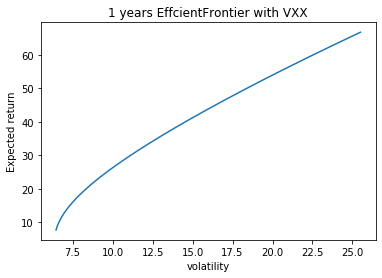

In [16]:
#1 years effcientFronter with VXX
R_cov4 =  np.array(R_copy.cov())
R_expect4 = np.array(R_copy.mean()).reshape(-1,1)
g4,h4,min_sigma4 = ghm(R_expect4,R_cov4)
sigma_v,mu_v,weight_v = effcientfrontier(g4,h4,R_cov4,2000,200000)
plt.plot(sigma_v,mu_v)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.show()

In [0]:
#Find the maximun sharpe ratio
def sharpe_ratio(sigma_v,mu_v,rf):
  sharpe = 0
  m = 0
  for i in range(len(sigma_v)):
    k_t = (mu_v[i] - rf*100)/sigma_v[i]
    if k_t > sharpe:
      sharpe = k_t
      m = i
  return sharpe,m


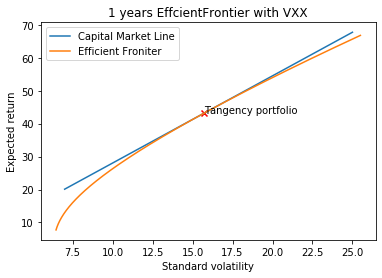

In [18]:
rf = 0.0158 # Choose 1 year US treasury rate as risk free rate
sigma_x = np.linspace(7,25,1000).reshape(-1,1)
sharpe,index_ = sharpe_ratio(sigma_v,mu_v,rf)
targent_v = (sharpe * sigma_x + rf*100).reshape(-1,1)
plt.plot(sigma_x,targent_v,label = "Capital Market Line")
plt.plot(sigma_v,mu_v,label = "Efficient Froniter")
plt.scatter(sigma_v[index_], mu_v[index_], color='r',marker = "x")
plt.text(sigma_v[index_], mu_v[index_],'Tangency portfolio',ha='left',fontsize=10)
plt.ylabel("Expected return")
plt.xlabel("Standard volatility")
plt.title("1 years EffcientFrontier with VXX")
plt.legend()
plt.show()


In [19]:
weight_v[index_]  # weight for tangency portfoilo

array([[-0.01992031],
       [-0.0025323 ],
       [-0.07284794],
       [ 0.01662097],
       [ 0.09063394],
       [ 0.23591236],
       [-0.01318019],
       [ 0.03992236],
       [-0.01021448],
       [ 0.10619114],
       [ 0.03165072],
       [ 0.3382641 ],
       [ 0.25686476],
       [ 0.02140161],
       [ 0.06061219],
       [ 0.16374803],
       [-0.59547158],
       [-0.05001842],
       [ 0.21294647],
       [ 0.06996573],
       [ 0.11945084]])

In [20]:
filecsv_list

['VZ.csv',
 'BABA.csv',
 'GOOG.csv',
 'KO.csv',
 'TEL.csv',
 'PG.csv',
 'MAR.csv',
 'FB.csv',
 'BAC.csv',
 'LULU.csv',
 'SKX.csv',
 'JPM.csv',
 'AEP.csv',
 'AMD.csv',
 'DIS.csv',
 'WMT.csv',
 'BRK-B.csv',
 'MCD.csv',
 'AAPL.csv',
 'TM.csv']

In [21]:
weight_v[index_]*500000

array([[  -9960.15340479],
       [  -1266.14901731],
       [ -36423.97152479],
       [   8310.48399868],
       [  45316.97077624],
       [ 117956.18073249],
       [  -6590.09333769],
       [  19961.17958912],
       [  -5107.24234546],
       [  53095.56975296],
       [  15825.36127658],
       [ 169132.05094267],
       [ 128432.38161741],
       [  10700.8065328 ],
       [  30306.09280769],
       [  81874.01694402],
       [-297735.79134959],
       [ -25009.21241495],
       [ 106473.2329959 ],
       [  34982.86525729],
       [  59725.42017073]])

In [22]:
np.sum(np.abs(weight_v[index_]))/np.sum(weight_v[index_]) #leverage for the tangency portfoilo

2.5283704535783156